## Лабораторная работа №1. Классификация текстов на реальных данных.

### Работу выполнил студент ПИ21-4 Кусербаев Карим Ильгамович



*   Задание 1. Произведите автоматический сбор информации из Интернет-ресурса по отзывам посетителей.
*   Задание 2. Проведите предпроцессинг данных (очистку данных, удалите выбросов, пустые значения и т.д). Выполните описательную статистику.
*   Задание 3. Проведите анализ предметной области и сделайте несколько практических выводов, исходя из данных. (Визуализация и выводы)
*   Задание 4. Проведите обработку текста. Сравните классы.
*   Задание 5. Примените 4 метода машинного обучения и результаты оформите по примеру таблицы 1.
*   Задание 6. Сделать вывод.










### Импортируем библиотеки

In [190]:
import re

In [ ]:
import spacy
from spacy import displacy
from collections import Counter

In [10]:
pip install natasha

In [121]:
pip install -U spacy>=3.0

In [122]:
!python -m spacy download ru_core_news_md

2023-09-27 22:32:14.023398: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-27 22:32:14.980423: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 MB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 24.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_md')


In [11]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [12]:
from natasha import (
    Segmenter,
    MorphVocab,

    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,

    PER,
    NamesExtractor,

    Doc
)

In [13]:
sns.set(rc={'figure.figsize':(8, 5)})

### Задание 1. Произведите автоматический сбор информации из Интернет-ресурса по отзывам посетителей.

Функция для обработки дат

In [ ]:
month_names = {
    'января': 1,
    'февраля': 2,
    'марта': 3,
    'апреля': 4,
    'мая': 5,
    'июня': 6,
    'июля': 7,
    'августа': 8,
    'сентября': 9,
    'октября': 10,
    'ноября': 11,
    'декабря': 12
}

def date_converter(date_str):
  date_parts = date_str.split()
  day = int(date_parts[0])
  month = month_names[date_parts[1]]
  year = int(date_parts[2])
  date_obj = date(year, month, day)
  return date_obj



Парсинг отзывов. Цель - обработать 2000 страниц сайта.

In [ ]:
reviews_data = []
for x in range(1, 2001):

  # Запрос к сайту
  url = f'https://www.restoran.ru/msk/opinions/?PAGEN_1={x}'
  page = requests.get(url)
  soup = BeautifulSoup(page.text, "html.parser")
  allReviews = soup.findAll('div', class_='review-wrap')

  # Обработка отзывов
  for review in allReviews:
    try:
      review_name = review.find('div', class_='place-name-wrap').a.text.strip()
    except:
      review_name = None

    try:
      review_text = review.find('span', class_='review-text-full').text.strip()
    except:
      review_text = review.find('span', class_='review-text-preview').text.strip()


    rating_categories = review.find('div', class_='review-plus-wrap')
    advantage = review.find('div', class_='review-plus-wrap')
    disadvantage = review.find('div', class_='review-minus-wrap')
    if advantage is not None:
      advantage = advantage.find_all('div')[1]
      advantage = advantage.text.strip()
    if disadvantage is not None:
      disadvantage = disadvantage.find_all('div')[1]
      disadvantage = disadvantage.text.strip()


    review_date = date_converter(review.find('div', class_='review-date').text.strip())

    try:
      rating = float(review.find('div', class_='review-rating-wrap').span.text.strip())
    except:
      continue



    review_data = {
        'Name': review_name,
        'Review Text': review_text,
        'Advantages': advantage,
        'Disadvantages': disadvantage,
        'Review Date': review_date,
        'Rating': rating
    }


    reviews_data.append(review_data)

  # Статистика
  if x % 50 == 0:
    print(f'{x} из 2000')
    print(f'Количество отзывов: {len(reviews_data)}')
    print('__________________________')

  # Предварительное сохранение данных
  if x%100==0:
    (pd.DataFrame.from_dict(reviews_data)).to_excel(f'df_reviews_{x*20}.xlsx')
    print("Успешно сохранено")


50 из 2000
Количество отзывов: 1000
__________________________
100 из 2000
Количество отзывов: 2000
__________________________
Успешно сохранено
150 из 2000
Количество отзывов: 2999
__________________________
200 из 2000
Количество отзывов: 3993
__________________________
Успешно сохранено
250 из 2000
Количество отзывов: 4993
__________________________
300 из 2000
Количество отзывов: 5993
__________________________
Успешно сохранено
350 из 2000
Количество отзывов: 6993
__________________________
400 из 2000
Количество отзывов: 7993
__________________________
Успешно сохранено
450 из 2000
Количество отзывов: 8993
__________________________
500 из 2000
Количество отзывов: 9993
__________________________
Успешно сохранено
550 из 2000
Количество отзывов: 10993
__________________________
600 из 2000
Количество отзывов: 11991
__________________________
Успешно сохранено
650 из 2000
Количество отзывов: 12988
__________________________
700 из 2000
Количество отзывов: 13987
____________________

Последние 500 страниц почти не содержали отзывы с оценкой, потому что на сайте еще не было такой опции. Отзывы без оценки отсеим, потому что на них мы не сможем использовать их для обучения модели

### Задание 2. Проведите предпроцессинг данных (очистку данных, удалите выбросов, пустые значения и т.д). Выполните описательную статистику.
### Задание 3. Провидите анализ предметной области и сделайте несколько практических выводов, исходя из данных. (Визуализация и выводы)

#### Начало работы с собранными данными

Обработка данных. Для работы переносим данные из заранее сохраненного файла xlsx формата в pandas.

In [14]:
df_reviews = pd.read_excel('df_reviews_40000.xlsx', index_col=0)
#df_reviews = pd.DataFrame.from_dict(reviews_data)

Меняем пустые значения с None на np.nan для работы с ними в pandas, переводим дату в понятный для питона datetime

In [15]:
df_reviews = df_reviews.fillna(value=np.nan)

In [16]:
df_reviews['Review Date'] = pd.to_datetime(df_reviews['Review Date'])

Выводим первые 5 строк для проверки данных

In [17]:
df_reviews.head()

,Name,Review Text,Advantages,Disadvantages,Review Date,Rating
0,Клуб Hot Collection / Хот Коллекшн,"Мне нравится декор и освещение в этом клубе, х...",NaN,NaN,2023-09-15,5.0
1,Ресторан Birds,Отличное место!!! Все суппер!!! Очень понравил...,Вид из окна,официант САВЧЕНКО ЕГОР ТРЕБОВАЛ В ГРУБОЙ ФОРМЕ...,2023-09-14,3.9
2,Клуб Hot Collection / Хот Коллекшн,Очень замечательное место с прекрасными видами...,"Очень замечательные услуги, красивые девушки, ...",ничего,2023-09-14,5.0
3,Банкетный зал Сосны в отеле Роял Зенит,Классное место! Атмосфера приятная и расслабле...,Общая атмосфера и кухня,Не заметили,2023-09-13,5.0
4,Клуб Hot Collection / Хот Коллекшн,"Мне понравилась праздничная атмосфера, веселье...","Веселое место, музыка, энтузиазм и очень прием...",Я не нашел никаких минусов,2023-09-13,5.0


Округляем значения рейтинга, чтобы возможно было решить задачу классификации

In [18]:
df_reviews['Rating'] = df_reviews['Rating'].round().astype('int32')

In [19]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32115 entries, 0 to 32114
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Name           22224 non-null  object        
 1   Review Text    32075 non-null  object        
 2   Advantages     3989 non-null   object        
 3   Disadvantages  3407 non-null   object        
 4   Review Date    32115 non-null  datetime64[ns]
 5   Rating         32115 non-null  int32         
dtypes: datetime64[ns](1), int32(1), object(4)
memory usage: 1.6+ MB


In [20]:
df_reviews.Rating.describe()

count    32115.000000
mean         4.220146
std          1.439870
min          0.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

Смотрим на пустые значения. Имена нам и так не понадобятся для обучения, как и дата отзыва. Достоинства и недостатки объединим с текстами отзывов, а пустые строки с пустым значением у текстов удалим.

In [22]:
df_reviews.isna().sum()

Name              9891
Review Text         40
Advantages       28126
Disadvantages    28708
Review Date          0
Rating               0
dtype: int64

#### Топ-5 заведений по количеству отзывов

In [23]:
df_reviews['Name'].value_counts().head()

Клуб Hot Collection / Хот Коллекшн    313
Ресторан Sixty / Сиксти               287
Ресторан Molon Lave / Молон Лаве      262
Ресторан Eshak / Ишак (Рублевка)      220
Ресторан Black Thai / Блэк Тай        220
Name: Name, dtype: int64

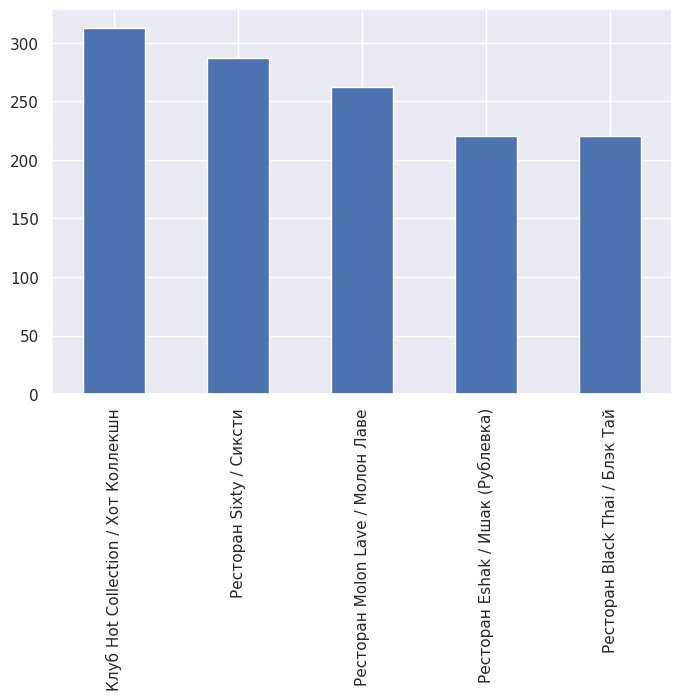

In [25]:
df_reviews['Name'].value_counts().head().plot(kind='bar')
plt.show()

Смотрим на популярность по годам самого популярного заведения. Выведем количество отзывов по годам, и оценку по этим годам.

In [26]:
most_pop_club = df_reviews[df_reviews['Name'] == 'Клуб Hot Collection / Хот Коллекшн']

In [27]:
most_pop_club.head()

,Name,Review Text,Advantages,Disadvantages,Review Date,Rating
0,Клуб Hot Collection / Хот Коллекшн,"Мне нравится декор и освещение в этом клубе, х...",NaN,NaN,2023-09-15,5
2,Клуб Hot Collection / Хот Коллекшн,Очень замечательное место с прекрасными видами...,"Очень замечательные услуги, красивые девушки, ...",ничего,2023-09-14,5
4,Клуб Hot Collection / Хот Коллекшн,"Мне понравилась праздничная атмосфера, веселье...","Веселое место, музыка, энтузиазм и очень прием...",Я не нашел никаких минусов,2023-09-13,5
6,Клуб Hot Collection / Хот Коллекшн,Надежный и стильный ночной клуб Hot Collection...,приятно провести время,ничего,2023-09-11,5
43,Клуб Hot Collection / Хот Коллекшн,Мое любимое место. У вас самые вкусные виды из...,Вкусные напитки и красивые девушки,Нет никаких,2023-08-26,5


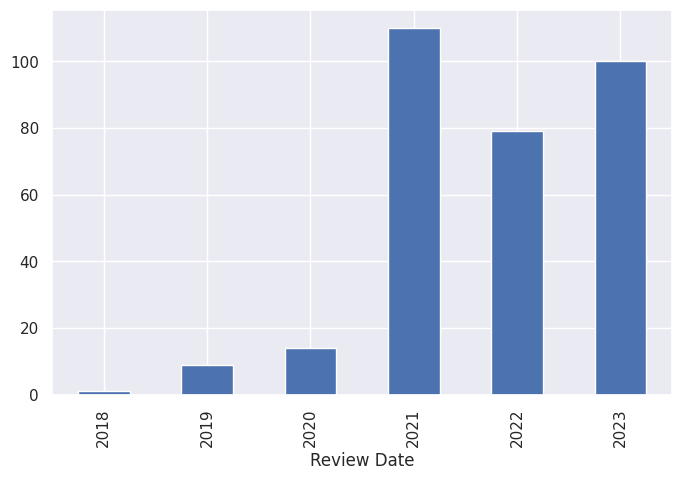

In [28]:
most_pop_club.groupby(most_pop_club['Review Date'].dt.year)['Rating'].count().plot(kind='bar')
plt.show()

Заметим, что популярность заведения значительно выросла после ковида. Теперь проверим, изменилась ли оценка.

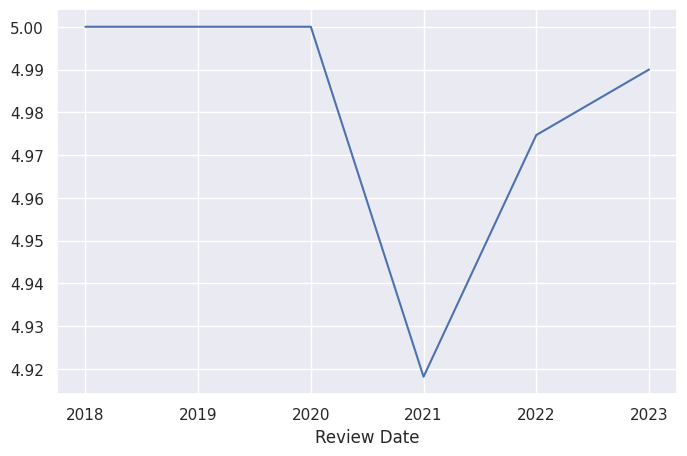

In [33]:
most_pop_club.groupby(most_pop_club['Review Date'].dt.year)['Rating'].mean().plot()
plt.show()

Из-за малого количества отзывов с 2018 по 2020 год, все рецензенты ставили 5 баллов заведению. Когда популярность выросла, появились более требовательные гости, которые немного (до 4.92) понизили оценку. Понижение было незначительное.

#### 10 заведений с самой плохой оценкой, для точности возьмем только рестораны, у которых более 25 отзывов

In [37]:
name_counts = df_reviews['Name'].value_counts()

mask = name_counts > 25

filtered = df_reviews[df_reviews['Name'].isin(name_counts[mask].index)]

По мнению отзовиков, худшим рестораном в Москве является Валенок. Рекомендую туда не ходить.

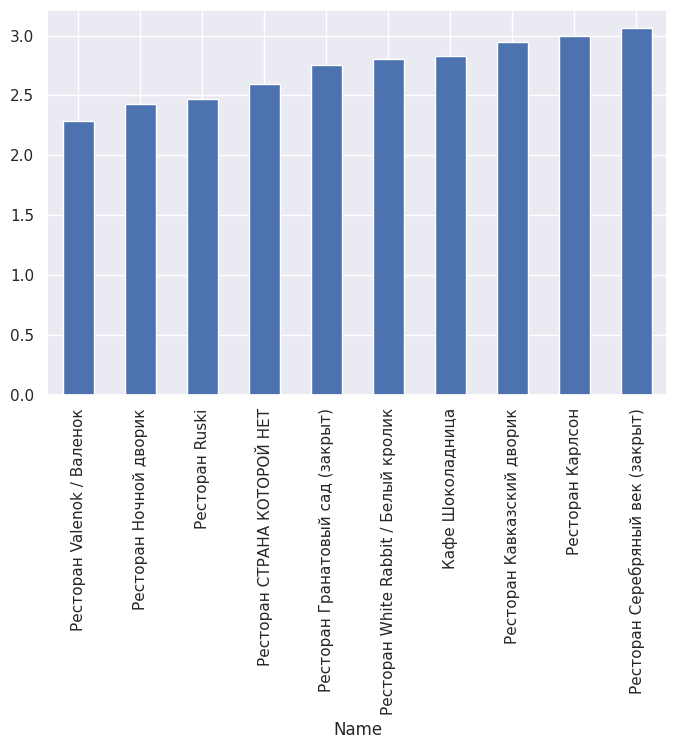

In [38]:
filtered.groupby(filtered["Name"])["Rating"].mean().sort_values(ascending=True).head(10).plot(kind='bar')
plt.show()

Давайте посмотрим, какие отзывы оставляли про самых худший ресторан.

In [51]:
df_reviews[df_reviews['Name'] == 'Ресторан Valenok / Валенок'].head()['Review Text'].iloc[3]

'Все отравились . Отстой'

In [52]:
df_reviews[df_reviews['Name'] == 'Ресторан Valenok / Валенок'].head()['Review Text'].iloc[4]

'Ужасная кухня,  холодный шашлык, тёплая окрошка .  Рыба на гриле готовится дольше шашлыка. Уровень среднего ресторана. Никому не советуем. Разочарование полное.'

In [56]:
df_reviews[df_reviews['Name'] == 'Ресторан Valenok / Валенок']['Review Text'].iloc[8]

'(Особую благодарность хотим выразить этому ресторану) в связи с прекрасным отношением к людям, а особенно к врачам после смены, которые хотят прийти и поужинать, при том что столик был заказан, для того чтобы посетить этот ресторан нужно накачать губы, побыть у пластического хирурга, открыть наполовину грудь, надеть самые дорогие украшения, и иметь хорошо обеспеченного мужчину, ВХОД ВРАЧАМ И УСТАВШИМ ЛЮДЯМ ПОСЛЕ 23:00 ЗАПРЕЩЁН, кроме как испорченного настроения вы ничего не получите, кроме как обходить этот ресторан стороной больше никакого желания нет!!!!!!!!!!!!!!!!'

### Задание 4. Провидите обработку текста. Сравните классы

#### Подготовка датасета для обучения модели

Для обучения модели названия ресторанов не несут практической информации, так как от названия не зависит качество еды, сервиса, обсуживания, расположения. Уберем столбец с названиями, а также с датой публикации.

In [57]:
data_reviews = df_reviews
data_reviews.head()

,Name,Review Text,Advantages,Disadvantages,Review Date,Rating
0,Клуб Hot Collection / Хот Коллекшн,"Мне нравится декор и освещение в этом клубе, х...",NaN,NaN,2023-09-15,5
1,Ресторан Birds,Отличное место!!! Все суппер!!! Очень понравил...,Вид из окна,официант САВЧЕНКО ЕГОР ТРЕБОВАЛ В ГРУБОЙ ФОРМЕ...,2023-09-14,4
2,Клуб Hot Collection / Хот Коллекшн,Очень замечательное место с прекрасными видами...,"Очень замечательные услуги, красивые девушки, ...",ничего,2023-09-14,5
3,Банкетный зал Сосны в отеле Роял Зенит,Классное место! Атмосфера приятная и расслабле...,Общая атмосфера и кухня,Не заметили,2023-09-13,5
4,Клуб Hot Collection / Хот Коллекшн,"Мне понравилась праздничная атмосфера, веселье...","Веселое место, музыка, энтузиазм и очень прием...",Я не нашел никаких минусов,2023-09-13,5


In [58]:
data_reviews.drop('Name', axis=1, inplace=True)

In [59]:
data_reviews.drop('Review Date', axis=1, inplace=True)

In [60]:
data_reviews.head()

,Review Text,Advantages,Disadvantages,Rating
0,"Мне нравится декор и освещение в этом клубе, х...",NaN,NaN,5
1,Отличное место!!! Все суппер!!! Очень понравил...,Вид из окна,официант САВЧЕНКО ЕГОР ТРЕБОВАЛ В ГРУБОЙ ФОРМЕ...,4
2,Очень замечательное место с прекрасными видами...,"Очень замечательные услуги, красивые девушки, ...",ничего,5
3,Классное место! Атмосфера приятная и расслабле...,Общая атмосфера и кухня,Не заметили,5
4,"Мне понравилась праздничная атмосфера, веселье...","Веселое место, музыка, энтузиазм и очень прием...",Я не нашел никаких минусов,5


Удалим повторяющиеся отзывы

In [61]:
data_reviews.drop_duplicates(keep='last', inplace=True)

Также уберем отзывы, у которых нет оценки и у которых нет текста

In [62]:
data_reviews.dropna(subset=['Review Text'], inplace=True)
data_reviews.dropna(subset=['Rating'], inplace=True)

In [63]:
data_reviews.isna().sum()

Review Text          0
Advantages       27212
Disadvantages    27793
Rating               0
dtype: int64

Теперь объединим столбец с достоинствами и недостатками в один столбец с общим текстом отзыва.

In [65]:
def combine_text(row):
    full_text = []
    if not pd.isna(row['Review Text']):
        full_text.append(row['Review Text'])
    if not pd.isna(row['Advantages']):
        full_text.append(row['Advantages'])
    if not pd.isna(row['Disadvantages']):
        full_text.append(row['Disadvantages'])
    return ' '.join(full_text)

data_reviews['Full Text'] = data_reviews.apply(combine_text, axis=1)

In [66]:
data_reviews["Full Text"][1]

'Отличное место!!! Все суппер!!! Очень понравилось! НО!!! в конце вечера, при расчете, после оплаты, официант ТРЕБОВАЛ чаевые))) желание оставлять на чай у нас сразу же исчезло!))) в след прозвучала фраза, что нас обслуживали бесплатно! Было ОЧЕНЬ НЕПРИЯТНО! Вид из окна официант САВЧЕНКО ЕГОР ТРЕБОВАЛ В ГРУБОЙ ФОРМЕ ЧАЕВЫЕ! ЧЕК № 371210 от 08.09.2023.'

In [67]:
data_reviews.head()

,Review Text,Advantages,Disadvantages,Rating,Full Text
0,"Мне нравится декор и освещение в этом клубе, х...",NaN,NaN,5,"Мне нравится декор и освещение в этом клубе, х..."
1,Отличное место!!! Все суппер!!! Очень понравил...,Вид из окна,официант САВЧЕНКО ЕГОР ТРЕБОВАЛ В ГРУБОЙ ФОРМЕ...,4,Отличное место!!! Все суппер!!! Очень понравил...
2,Очень замечательное место с прекрасными видами...,"Очень замечательные услуги, красивые девушки, ...",ничего,5,Очень замечательное место с прекрасными видами...
3,Классное место! Атмосфера приятная и расслабле...,Общая атмосфера и кухня,Не заметили,5,Классное место! Атмосфера приятная и расслабле...
4,"Мне понравилась праздничная атмосфера, веселье...","Веселое место, музыка, энтузиазм и очень прием...",Я не нашел никаких минусов,5,"Мне понравилась праздничная атмосфера, веселье..."


Удалим ненужные столбцы

In [68]:
data_reviews.drop(['Review Text', 'Advantages', 'Disadvantages'], axis=1, inplace=True)

In [69]:
data_reviews = data_reviews[['Full Text', 'Rating']]

In [70]:
data_reviews.head()

,Full Text,Rating
0,"Мне нравится декор и освещение в этом клубе, х...",5
1,Отличное место!!! Все суппер!!! Очень понравил...,4
2,Очень замечательное место с прекрасными видами...,5
3,Классное место! Атмосфера приятная и расслабле...,5
4,"Мне понравилась праздничная атмосфера, веселье...",5


In [71]:
data_reviews = data_reviews.reset_index(drop=True)

Ищем отзывы, которые будут мешать обучению

In [72]:
data_reviews[data_reviews['Rating'] == 0]

,Full Text,Rating
2160,"Отзыв удалён, поскольку не имеет отношения к д...",0
5459,"Отзыв удалён за грубость, как не имеющий отнош...",0


In [73]:
data_reviews.drop([2160, 5459], inplace=True)

In [74]:
mask = data_reviews['Full Text'].str.contains('удалён')

In [75]:
data_reviews = data_reviews[~mask]

In [76]:
data_reviews = data_reviews.reset_index(drop=True)

Построим облако слов, предварительно лемматизировав их и убрав стоп-слова. Посмотрим на слова, которые оставляют при плохом отзыве и при хорошем.

In [107]:
morph_vocab = MorphVocab()
segmenter = Segmenter()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)

In [82]:
sentences123 = []
sentences45 = []
for x in range(0, data_reviews['Full Text'].shape[0]):
  text = data_reviews['Full Text'][x]
  rating = data_reviews['Rating'][x]
  doc = Doc(text)
  doc.segment(segmenter)
  doc.tag_morph(morph_tagger)
  for token in doc.tokens:
      token.lemmatize(morph_vocab)
  sentence = ' '.join([_.lemma for _ in doc.tokens])
  if rating in [1, 2, 3]:
    sentences123.append(sentence)
  else:
    sentences45.append(sentence)

In [83]:
len(sentences123)

6122

In [84]:
len(sentences45)

25021

In [154]:
nlp = spacy.load('ru_core_news_md')
texts = sentences123[:1000] + sentences45[:100]
nouns = []
for text in texts:
  document = nlp(text)
  for token in document:
      if token.pos_ == 'NOUN':
          nouns.append(token.lemma_)
nouns = list(set(nouns))

In [158]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('russian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [159]:
stopwords += nouns
stopwords.extend(['наш', 'который', 'весь'])

In [136]:
def red_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 100%, 70%)"

def green_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(138, 100%, 40%)"

Облако слов для положительных отзывов

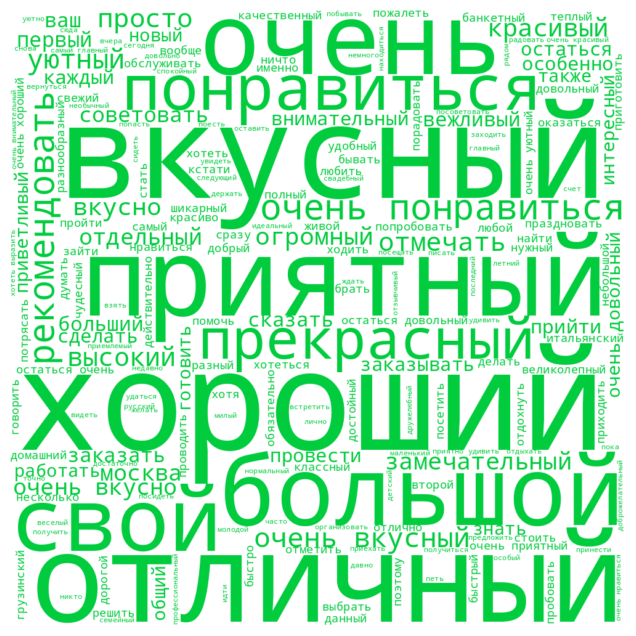

In [160]:
text = ' '.join(sentences45)
wordcloud = WordCloud(width=1000, height=1000, background_color="white",
                      stopwords=stopwords).generate(text).recolor(color_func=green_color_func)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Облако слов для отрицательных отзывов. Гораздо больше глаголов, меньше положительных слов.

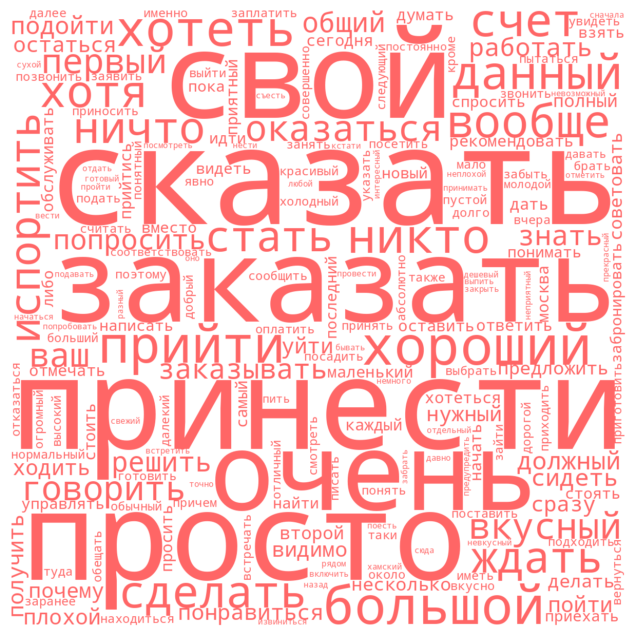

In [161]:
text = ' '.join(sentences123)
wordcloud = WordCloud(width=1200, height=1200, background_color="white",
                      stopwords=stopwords
                      ).generate(text).recolor(color_func=red_color_func)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [166]:
data_reviews = pd.read_csv('df_prepared.csv', index_col=0, encoding='utf-8')

Распределение по оценкам

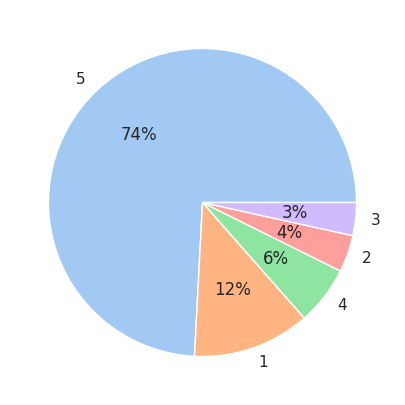

In [168]:
colors = sns.color_palette('pastel')[0:5]
values = data_reviews['Rating'].value_counts()
plt.pie(values, labels = values.index, colors = colors, autopct='%.0f%%')
plt.show()

Явный дисбаланс классов. Чтобы это исправить, понизим мажоритарный класс, а после этого увеличим миноритарные классы

In [203]:
X, y = data_reviews['Full Text'], data_reviews['Rating']

In [204]:
class1_index=np.where(y==1)[0]
class2_index=np.where(y==2)[0]
class3_index=np.where(y==3)[0]
class4_index=np.where(y==4)[0]
class5_index=np.where(y==5)[0]

In [205]:
class5_index_downsampled = np.random.choice(class5_index, len(class1_index), replace=False)
class5_index_downsampled.shape

(3839,)

In [206]:
class2_index_upsampled = np.random.choice(class2_index, len(class1_index), replace=True)
class3_index_upsampled = np.random.choice(class3_index, len(class1_index), replace=True)
class4_index_upsampled = np.random.choice(class4_index, len(class1_index), replace=True)
class4_index_upsampled.shape

(3839,)

In [207]:
y_new = pd.concat([y.iloc[class1_index], y.iloc[class2_index_upsampled],
                   y.iloc[class3_index_upsampled], y.iloc[class4_index_upsampled],
                   y.iloc[class5_index_downsampled]
                   ], axis=0)

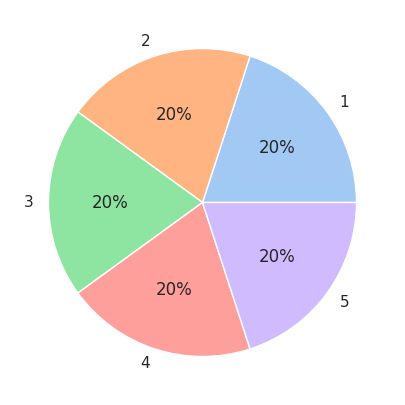

In [208]:
values = y_new.value_counts()
plt.pie(values, labels = values.index, colors = colors, autopct='%.0f%%')
plt.show()

In [209]:
X_new = pd.concat([X.iloc[class1_index], X.iloc[class2_index_upsampled],
                   X.iloc[class3_index_upsampled], X.iloc[class4_index_upsampled],
                   X.iloc[class5_index_downsampled]
                   ], axis=0)

In [210]:
def remove_non_russian(text):
    return re.sub(r'[^а-яА-ЯёЁ\s]+', '', text, flags=re.MULTILINE)

X_new = X_new.apply(remove_non_russian)
X_new


17       Часто ели их хинкали\nА вчера заказали на  чел...
59       Отвратительно работает персонал ресторана Понт...
60       Отвратительный сервис Отсутствие гибкости разд...
85        \nДобрый день комментариев нет\nЗвонил сегодн...
99       Были здесь в ночь с  на  Заказали салаты грече...
                               ...                        
22322    Доброго времени всем Долго искали ресторан для...
8024     Очень вкусная еда  сервис  соответствует ценам...
9794     Отличное место для завтраков встреч с друзьями...
27584    Были приятно удивлены качеством блюд и професс...
9793     Отличное местоВсем рекомендуюОсобенно понравил...
Name: Full Text, Length: 19195, dtype: object

In [211]:
X_new = X_new.str.lower()
pattern = r'\n'
X_new = X_new.str.replace(pattern, '')
X_new

<ipython-input-211-ef855a0e4e66>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  X_new = X_new.str.replace(pattern, '')


17       часто ели их хинкалиа вчера заказали на  челов...
59       отвратительно работает персонал ресторана понт...
60       отвратительный сервис отсутствие гибкости разд...
85        добрый день комментариев нетзвонил сегодняв р...
99       были здесь в ночь с  на  заказали салаты грече...
                               ...                        
22322    доброго времени всем долго искали ресторан для...
8024     очень вкусная еда  сервис  соответствует ценам...
9794     отличное место для завтраков встреч с друзьями...
27584    были приятно удивлены качеством блюд и професс...
9793     отличное местовсем рекомендуюособенно понравил...
Name: Full Text, Length: 19195, dtype: object

In [212]:
y_new

17       1
59       1
60       1
85       1
99       1
        ..
22322    5
8024     5
9794     5
27584    5
9793     5
Name: Rating, Length: 19195, dtype: int64

In [213]:
X_new.reset_index(drop=True)
y_new.reset_index(drop=True)

0        1
1        1
2        1
3        1
4        1
        ..
19190    5
19191    5
19192    5
19193    5
19194    5
Name: Rating, Length: 19195, dtype: int64

In [214]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('russian')
morph_vocab = MorphVocab()
segmenter = Segmenter()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [215]:
def lemmatize_text(text):
  doc = Doc(text)
  doc.segment(segmenter)
  doc.tag_morph(morph_tagger)
  for token in doc.tokens:
    token.lemmatize(morph_vocab)
  sentence = ' '.join([_.lemma for _ in doc.tokens])
  return sentence
lemmatized_text = [lemmatize_text(text) for text in X_new]

In [216]:
len(lemmatized_text)

19195

In [272]:
from sklearn.feature_extraction.text import TfidfVectorizer
import re
vectorizer = TfidfVectorizer(stop_words=stopwords)
vectors = vectorizer.fit_transform(lemmatized_text)
vectors.shape

(19195, 45137)

Данные лемматизированы, векторизированы, убраны стоп слова и подготовлены для обучения моделей.

### Задание 5. Примените 4 метода машинного обучения и результаты оформите по примеру таблицы 1

In [218]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vectors, y_new, test_size=0.2, random_state=42)

Обучаем модели, ниже будет вывод таблицы

In [223]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

models = [LogisticRegression(C=1),
          MultinomialNB(alpha=.01),
          MLPClassifier(solver='adam', alpha=0.01,
                        hidden_layer_sizes=(25, 5),
                        random_state=1, max_iter=2000),
          SVC(C=2, gamma=1),
          SVC(C=5, gamma=1)
          ]

results = pd.DataFrame(columns=['Model', 'Train Time', 'Test Time', 'Runtime', 'F1 Score'])

for model_idx in range(5):
    model = models[model_idx]
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    start_time = time.time()
    y_pred = model.predict(X_test)
    test_time = time.time() - start_time

    f1 = f1_score(y_test, y_pred, average='macro' )

    total_runtime = train_time + test_time

    results = results.append({
        'Model': f'Model {model_idx + 1}',
        'Train Time': train_time,
        'Test Time': test_time,
        'Runtime': total_runtime,
        'F1 Score': f1
    }, ignore_index=True)

print(results)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-223-44ff124cdac2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-223-44ff124cdac2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-223-44ff124cdac2>:32: FutureWarning: The frame.append method is deprecated a

     Model  Train Time  Test Time     Runtime  F1 Score
0  Model 1    9.571215   0.002776    9.573991  0.745599
1  Model 2    0.033556   0.002863    0.036419  0.792463
2  Model 3  240.726127   0.019073  240.745199  0.804978
3  Model 4   99.774790  16.996653  116.771443  0.896530
4  Model 5   90.948594  15.353412  106.302006  0.897264


<ipython-input-223-44ff124cdac2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({


In [224]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
import matplotlib.pyplot as plt

Теперь выведем матрицу ошибок для каждой обученной модели

0.745329460699991


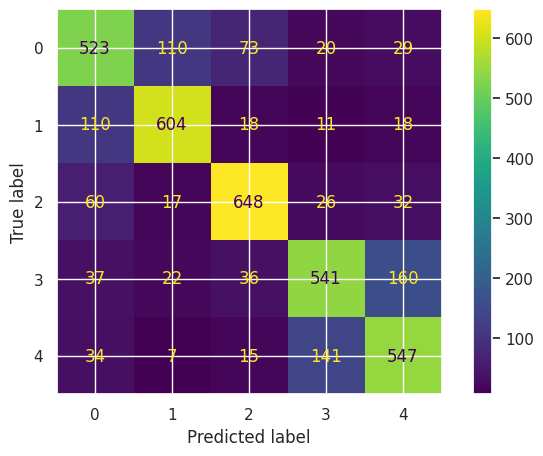

In [226]:
clf = LogisticRegression(C=1, max_iter=200)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
cm = confusion_matrix(y_test, pred, labels=[1, 2, 3, 4, 5])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
print(f1_score(y_test, pred, average='macro'))
disp.plot()
plt.show()


0.7924629760628157


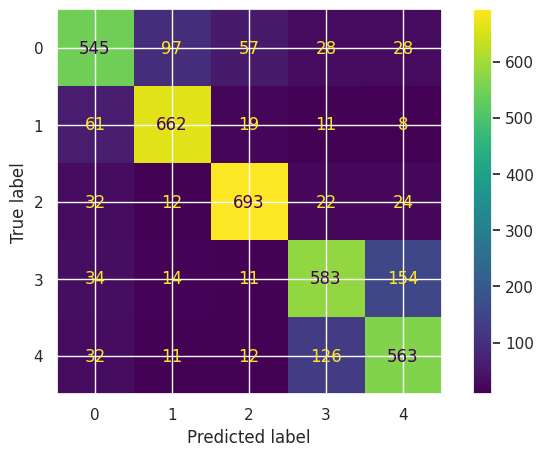

In [227]:
clf = MultinomialNB(alpha=.01)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
cm = confusion_matrix(y_test, pred, labels=[1, 2, 3, 4, 5])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
print(f1_score(y_test, pred, average='macro'))
disp.plot()
plt.show()


0.8214308004519759


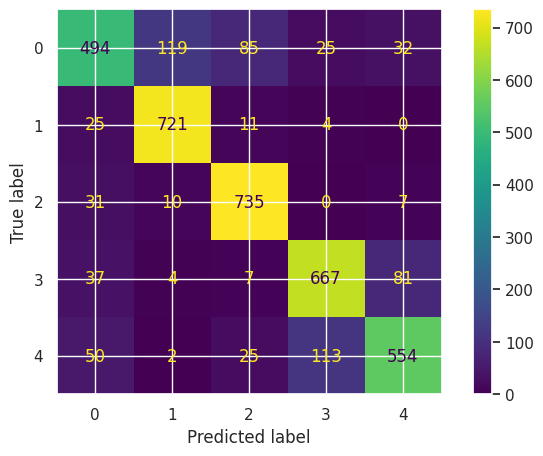

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=0.01,
                          hidden_layer_sizes=(25, 5), random_state=1, max_iter=2000)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
cm = confusion_matrix(y_test, pred, labels=[1, 2, 3, 4, 5])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
print(f1_score(y_test, pred, average='macro'))
disp.plot()
plt.show()

0.9050041732216789


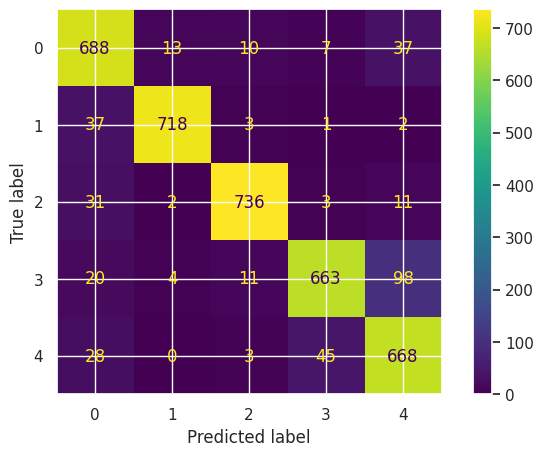

In [ ]:
from sklearn.svm import SVC
clf = SVC(C=2)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
cm = confusion_matrix(y_test, pred, labels=[1, 2, 3, 4, 5])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
print(f1_score(y_test, pred, average='macro'))
disp.plot()
plt.show()

0.8980566097157696


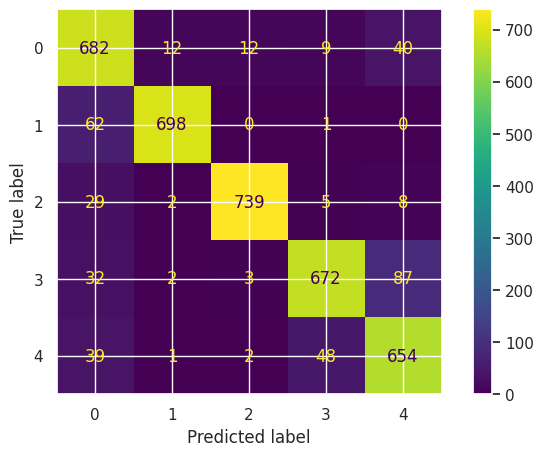

In [230]:
from sklearn.svm import SVC
clf = SVC(C=3)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
cm = confusion_matrix(y_test, pred, labels=[1, 2, 3, 4, 5])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
print(f1_score(y_test, pred, average='macro'))
disp.plot()
plt.show()

0.8977922978820114


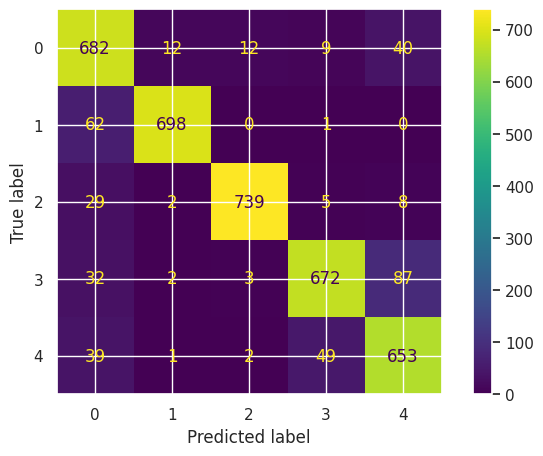

In [229]:
from sklearn.svm import SVC
clf = SVC(C=5)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
cm = confusion_matrix(y_test, pred, labels=[1, 2, 3, 4, 5])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
print(f1_score(y_test, pred, average='macro'))
disp.plot()
plt.show()

### Задание 6. Сделать вывод.

In [315]:
results.set_index('Model')

,Train Time,Test Time,Runtime,F1 Score
Model,,,,
Logistic Regression,9.571215,0.002776,9.573991,0.745599
MultinomialNB,0.033556,0.002863,0.036419,0.792463
MLP Classifier,240.726127,0.019073,240.745199,0.804978
SVC (C=2),99.774790,16.996653,116.771443,0.896530
SVC (C=5),90.948594,15.353412,106.302006,0.897264


Вывод: Лучше всего показала себя модель SVC (C=5). Можно заметить, что модель перцептрона обучалась дольше всех, а модель наивных баесов очень быстро обучилась, но выдала почти худший результат.

Дополнительное задание

In [241]:
clf = SVC(C=2)
clf.fit(X_train, y_train)

SVC(C=2)

In [311]:
vectorizer = TfidfVectorizer(stop_words=stopwords).fit(lemmatized_text)

In [283]:
text_review = 'Очень вкусно, сходите не пожалеете'
text_vector = vectorizer.transform([text_review])
print(f'Предсказанный рейтинг: {clf.predict(text_vector)[0]}')

Предсказанный рейтинг: 5


In [310]:
text_review = 'Это самая непонятная еда в моей жизни. Вроде вкусно, а вроде странно'
text_vector = vectorizer.transform([text_review])
print(f'Предсказанный рейтинг: {clf.predict(text_vector)[0]}')

Предсказанный рейтинг: 4


In [284]:
text_review = 'Еда для собак'
text_vector = vectorizer.transform([text_review])
print(f'Предсказанный рейтинг: {clf.predict(text_vector)[0]}')

Предсказанный рейтинг: 4


In [309]:
text_review = 'Нормально'
text_vector = vectorizer.transform([text_review])
print(f'Предсказанный рейтинг: {clf.predict(text_vector)[0]}')

Предсказанный рейтинг: 3


In [318]:
text_review = 'Еда ужасная, но официант красивый'
text_vector = vectorizer.transform([text_review])
print(f'Предсказанный рейтинг: {clf.predict(text_vector)[0]}')

Предсказанный рейтинг: 2


In [285]:
text_review = 'Забегаловка'
text_vector = vectorizer.transform([text_review])
print(f'Предсказанный рейтинг: {clf.predict(text_vector)[0]}')

Предсказанный рейтинг: 1


In [281]:
text_review = 'Ужасно!!!'
text_vector = vectorizer.transform([text_review])
print(f'Предсказанный рейтинг: {clf.predict(text_vector)[0]}')

Предсказанный рейтинг: 1


Модель отлично определяет однозначные отзывы с оценкой 1 и 5, но с 2,3,4 справляется хуже. У этих классов изначально было меньше всего данных, и у модели маленький диапазон для определения таких отзывов, обычно они сложные, неоднозначные.